In [6]:
from read_data import read_data
from data_analysis import analyze_data
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
import cv2


In [7]:
# ---- Read the data ----
base_name = 'big_cats'
width = 80
data = joblib.load(f'{base_name}_debug.pkl')

In [8]:
from feature_extraction import apply_sift
# https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.313.1996&rep=rep1&type=pdf
data = apply_sift(data)

# for des in data['sift_description'][:5]:
#     print('\n')
#     for d in des:
#         print(d)

# TODO Sift can also be used with a mask (similar to a ROI)
# Maybe we can detect the animal fist using edge detection (maybe Sobel?)
# And then use SIFT
# http://amroamroamro.github.io/mexopencv/matlab/cv.SIFT.detectAndCompute.html

# Apply sift inserts the result (descriptions) in data['sift_description']
# Do we need to take the keypoints into account?

# Maybe use knn or svm : https://liverungrow.medium.com/sift-bag-of-features-svm-for-classification-b5f775d8e55f



Images per class:  Counter({'Leopard': 10, 'Tiger': 10, 'Cheetah': 10, 'Jaguar': 10, 'Lion': 10})
['Cheetah' 'Jaguar' 'Leopard' 'Lion' 'Tiger']
images of class:  Cheetah


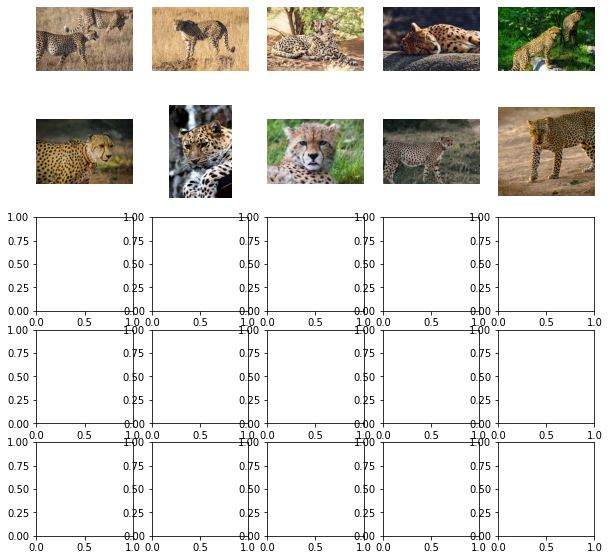

images of class:  Jaguar


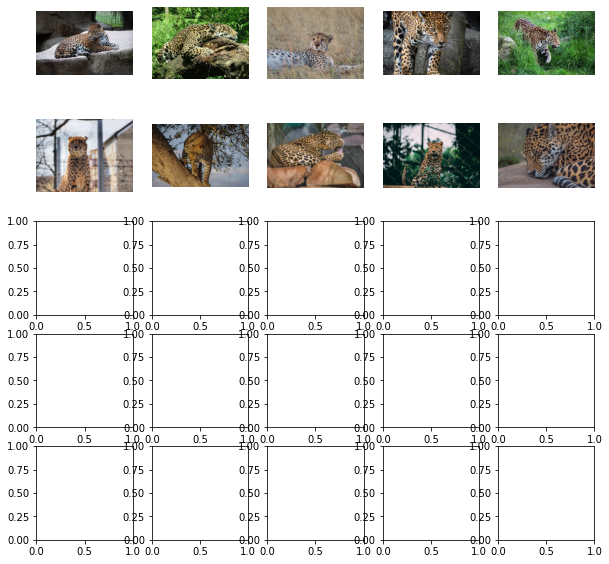

images of class:  Leopard


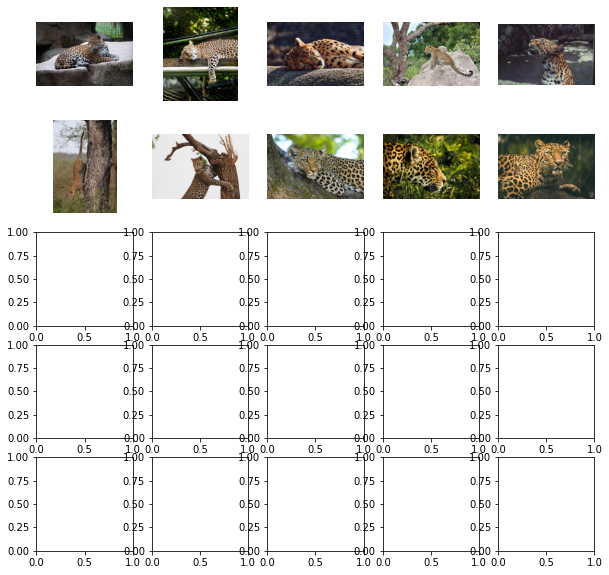

images of class:  Lion


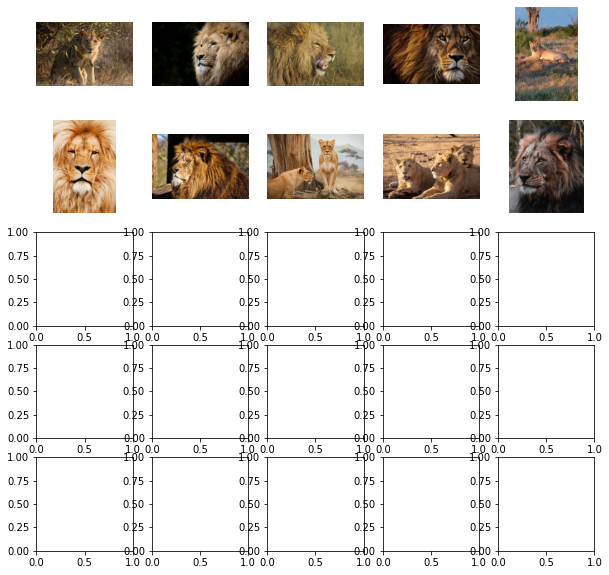

images of class:  Tiger


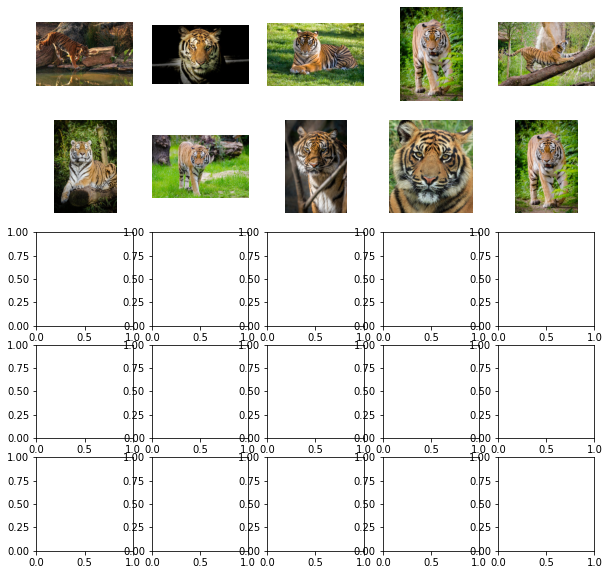

In [9]:
# ---- Show the images by class ----
c = Counter(data['label'])
print("Images per class: ", c)
print(np.unique(data['label']))

# Loop through all the different classes
for img_class in np.unique(data['label']):
    print('images of class: ', img_class)
     # Loop through all the images of that class
    counter = 0
      # Create a 5x5 grid of images
    fig, ax = plt.subplots(5, 5, figsize=(10, 10))
    for idx, img in enumerate(data['image']):
        # Show the images of that class
        if data["label"][idx] == img_class:
            i = int(counter / 5)
            j = counter % 5
            ax[i, j].imshow(img)
            ax[i, j].axis('off')
            counter += 1
            if counter >= 25:
                break
    plt.show()


In [ ]:
# https://realpython.com/face-recognition-with-python/
# from cv2 import CascadeClassifier
# import cv2

# test_img1 = np.float32(data['image'][5])

# test_img1 = cv2.cvtColor(test_img1, cv2.COLOR_RGB2GRAY)

# test_img1 = cv2.normalize(test_img1, None, 0, 255,
#                          cv2.NORM_MINMAX).astype('uint8')

# cv2.imshow('test igm', test_img1)

# classifier = CascadeClassifier('haarcascade_frontalface_default.xml')

# faces = classifier.detectMultiScale(
#     test_img1,
#     scaleFactor=1.1,
#     minNeighbors=5,
#     minSize=(30, 30),
#     flags=cv2.CASCADE_SCALE_IMAGE
# )

# print ("Found {0} faces!".format(len(faces)))

# # Draw a rectangle around the faces
# for (x, y, w, h) in faces:
#     cv2.rectangle(test_img1, (x, y), (x+w, y+h), (0, 255, 0), 2)

# cv2.imshow("Faces found", test_img1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Found 0 faces!


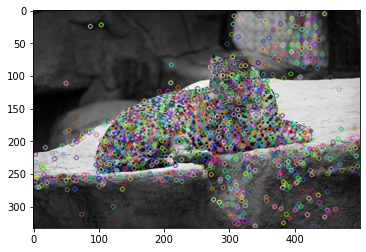

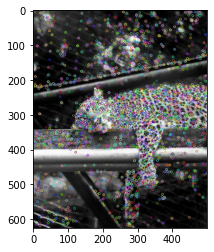

[<DMatch 0x7f870d316390>, <DMatch 0x7f870d4a9df0>, <DMatch 0x7f870d30ead0>, <DMatch 0x7f870d321230>, <DMatch 0x7f870d30b070>, <DMatch 0x7f8711d3ac10>, <DMatch 0x7f870c5e2410>, <DMatch 0x7f870d3231b0>, <DMatch 0x7f870d30efd0>, <DMatch 0x7f870d4a9730>, <DMatch 0x7f870d4a9d70>, <DMatch 0x7f870d4a9b10>, <DMatch 0x7f870d321210>, <DMatch 0x7f870d338dd0>, <DMatch 0x7f870d3382f0>, <DMatch 0x7f870d4a96d0>, <DMatch 0x7f870d323e50>, <DMatch 0x7f870d4a9af0>, <DMatch 0x7f870d323db0>, <DMatch 0x7f870d3389f0>, <DMatch 0x7f870d321250>, <DMatch 0x7f870d316970>, <DMatch 0x7f870d30bf90>, <DMatch 0x7f870d30b2b0>, <DMatch 0x7f870d30ec90>, <DMatch 0x7f870d3162b0>, <DMatch 0x7f8711d3ac90>, <DMatch 0x7f870d3166d0>, <DMatch 0x7f870d316ab0>, <DMatch 0x7f870d321070>, <DMatch 0x7f870d3213b0>, <DMatch 0x7f870d323a10>, <DMatch 0x7f870d323270>, <DMatch 0x7f870d30e2f0>, <DMatch 0x7f870d316730>, <DMatch 0x7f870d30e110>, <DMatch 0x7f870d30e310>, <DMatch 0x7f870c5e2dd0>, <DMatch 0x7f870d316e50>, <DMatch 0x7f870d4a9dd0>,

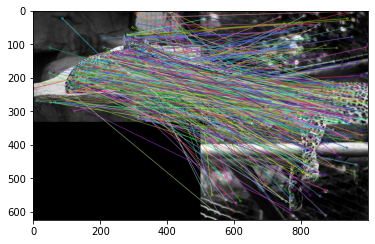

In [10]:
# ---- Feature selection (Examples for 1 image) ----

# -- SIFT --
# https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/
def apply_sift(test_img):
    
    # Get the sift keypoints and the corresponding descriptors
    sift = cv2.SIFT_create() 
    kp, des = sift.detectAndCompute(test_img, None)
    # Draw the keypoints and show them on the image
    test_img = cv2.drawKeypoints(test_img, kp, test_img)
    plt.imshow(test_img)
    plt.show()
    return kp, des

test_img1 = np.float32(data['image'][0])
test_img2 = np.float32(data['image'][1])

# Grayscale the images
test_img1 = cv2.cvtColor(test_img1, cv2.COLOR_RGB2GRAY)
test_img2 = cv2.cvtColor(test_img2, cv2.COLOR_RGB2GRAY)

# Convert the image to a binary image (uint8)
test_img1 = cv2.normalize(test_img1, None, 0, 255,
                         cv2.NORM_MINMAX).astype('uint8')
test_img2 = cv2.normalize(test_img2, None, 0, 255,
                         cv2.NORM_MINMAX).astype('uint8')


kp1, des1 = apply_sift(test_img1)
kp2, des2 = apply_sift(test_img2)

# match the features
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(des1, des2)
# Only get the best matches
matches = sorted(matches, key=lambda x: x.distance)

print(matches)

result_img = cv2.drawMatches(test_img1, kp1, test_img2, kp2, matches, test_img2, flags=2)
plt.imshow(result_img)
plt.show()


In [ ]:
# -- Edge detection using Sobel --
# from skimage.filters import sobel_h, sobel_v

# test_img = np.float32(data['image'][0])

# # Grayscale the images
# test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)

# sobel_img_h = sobel_h(test_img)
# sobel_img_v = sobel_v(test_img)

# plt.imshow(sobel_img_h, cmap='gray')
# plt.show()
# plt.imshow(sobel_img_v, cmap='gray')
# plt.show()

In [ ]:


# These points are required, but (obviously) not in this order

# ---- Data Analysis ----

# ---- Feature selection and dimension reduction ----
# Hough transform
# HoG feature extraction

# ---- Classification ----

# ---- Clustering ----

# ---- Grid search ----

# ---- Model evaluation ----

# ---- Data augmentation ----

# ---- Ensemble ----
